Introdução a Analise de dados
================

Hoje faremos juntos uma analise dos dados de nascidos vivos, no estado do Rio de Janeiro em 2015.

-------

Vamos usar a biblioteca pysus para importar esses dados

In [1]:
import pandas
from pysus.utilities.readdbc import read_dbc
df = read_dbc("DNRJ2015.dbc")

True


## Conhecendo os dados

O primeiro passo de qualquer analise é conhecer os dados que você tem em mãos.

In [2]:
df.head()

,NUMERODN,CODINST,ORIGEM,NUMERODV,PREFIXODN,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,...,TPNASCASSI,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,TPROBSON,STDNEPIDEM,STDNNOVA,CODPAISRES,PARIDADE
0,13660401,MRJ3303900001,1,,,2275554,330390,2,26,1,...,,,,,,11,0,0,1,0
1,53258484,RRJ3304550000,1,0,30,2273101,330412,1,27,1,...,,,,,,11,0,0,1,1
2,53258485,RRJ3304550000,1,8,30,2273101,330412,1,28,1,...,,,,,,11,0,0,1,0
3,53302375,RRJ3304550000,1,2,30,2290073,330140,1,19,1,...,,,,,,11,0,0,1,0
4,53302376,RRJ3304550000,1,0,30,2290073,330140,1,18,1,...,,,,,,11,0,0,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236960 entries, 0 to 236959
Data columns (total 63 columns):
NUMERODN      236960 non-null object
CODINST       236960 non-null object
ORIGEM        236960 non-null object
NUMERODV      236960 non-null object
PREFIXODN     236960 non-null object
CODESTAB      236960 non-null object
CODMUNNASC    236960 non-null object
LOCNASC       236960 non-null object
IDADEMAE      236960 non-null object
ESTCIVMAE     236960 non-null object
ESCMAE        236960 non-null object
CODOCUPMAE    236960 non-null object
QTDFILVIVO    236960 non-null object
QTDFILMORT    236960 non-null object
CODMUNRES     236960 non-null object
GESTACAO      236960 non-null object
GRAVIDEZ      236960 non-null object
PARTO         236960 non-null object
CONSULTAS     236960 non-null object
DTNASC        236960 non-null object
HORANASC      236960 non-null object
SEXO          236960 non-null object
APGAR1        236960 non-null object
APGAR5        236960 non-null object
R

Aqui notamos que varias linhas estão com dados em branco mas isso não se refletiu no `.info()`. Vamos descobrir o porque

In [4]:
df.loc[0]["NUMERODV"]

''

In [5]:
import numpy
df.replace("", numpy.nan, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236960 entries, 0 to 236959
Data columns (total 63 columns):
NUMERODN      236960 non-null object
CODINST       236960 non-null object
ORIGEM        236960 non-null object
NUMERODV      236957 non-null object
PREFIXODN     236957 non-null object
CODESTAB      235941 non-null object
CODMUNNASC    236960 non-null object
LOCNASC       236960 non-null object
IDADEMAE      236960 non-null object
ESTCIVMAE     236000 non-null object
ESCMAE        235691 non-null object
CODOCUPMAE    204189 non-null object
QTDFILVIVO    231039 non-null object
QTDFILMORT    227792 non-null object
CODMUNRES     236960 non-null object
GESTACAO      231701 non-null object
GRAVIDEZ      236732 non-null object
PARTO         236755 non-null object
CONSULTAS     236958 non-null object
DTNASC        236960 non-null object
HORANASC      236706 non-null object
SEXO          236960 non-null object
APGAR1        228592 non-null object
APGAR5        228947 non-null object
R

O que aconteceu é que no `import` o pandas não entendeu que os dados vazios, `''`, eram considerados nulos, `NaN`. Por isso a gente trocou os tipos e agora o pandas entende que os dados estão em falta.

In [7]:
df.head()

,NUMERODN,CODINST,ORIGEM,NUMERODV,PREFIXODN,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,...,TPNASCASSI,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,TPROBSON,STDNEPIDEM,STDNNOVA,CODPAISRES,PARIDADE
0,13660401,MRJ3303900001,1,NaN,NaN,2275554,330390,2,26,1,...,NaN,NaN,NaN,NaN,NaN,11,0,0,1,0
1,53258484,RRJ3304550000,1,0,30,2273101,330412,1,27,1,...,NaN,NaN,NaN,NaN,NaN,11,0,0,1,1
2,53258485,RRJ3304550000,1,8,30,2273101,330412,1,28,1,...,NaN,NaN,NaN,NaN,NaN,11,0,0,1,0
3,53302375,RRJ3304550000,1,2,30,2290073,330140,1,19,1,...,NaN,NaN,NaN,NaN,NaN,11,0,0,1,0
4,53302376,RRJ3304550000,1,0,30,2290073,330140,1,18,1,...,NaN,NaN,NaN,NaN,NaN,11,0,0,1,1


-----
Vamos analisar o nome das colunas e trocar de nome as que estiverem ilegiveis.

In [8]:
list(df.columns)

['NUMERODN',
 'CODINST',
 'ORIGEM',
 'NUMERODV',
 'PREFIXODN',
 'CODESTAB',
 'CODMUNNASC',
 'LOCNASC',
 'IDADEMAE',
 'ESTCIVMAE',
 'ESCMAE',
 'CODOCUPMAE',
 'QTDFILVIVO',
 'QTDFILMORT',
 'CODMUNRES',
 'GESTACAO',
 'GRAVIDEZ',
 'PARTO',
 'CONSULTAS',
 'DTNASC',
 'HORANASC',
 'SEXO',
 'APGAR1',
 'APGAR5',
 'RACACOR',
 'PESO',
 'IDANOMAL',
 'DTCADASTRO',
 'CODANOMAL',
 'NUMEROLOTE',
 'VERSAOSIST',
 'DTRECEBIM',
 'DIFDATA',
 'DTRECORIG',
 'NATURALMAE',
 'CODMUNNATU',
 'CODUFNATU',
 'ESCMAE2010',
 'SERIESCMAE',
 'DTNASCMAE',
 'RACACORMAE',
 'QTDGESTANT',
 'QTDPARTNOR',
 'QTDPARTCES',
 'IDADEPAI',
 'DTULTMENST',
 'SEMAGESTAC',
 'TPMETESTIM',
 'CONSPRENAT',
 'MESPRENAT',
 'TPAPRESENT',
 'STTRABPART',
 'STCESPARTO',
 'TPNASCASSI',
 'TPFUNCRESP',
 'TPDOCRESP',
 'DTDECLARAC',
 'ESCMAEAGR1',
 'TPROBSON',
 'STDNEPIDEM',
 'STDNNOVA',
 'CODPAISRES',
 'PARIDADE']

In [9]:
translate_dict = {
    "LOCNASC": "LOCAL_NASCIMENTO",
    "ESTCIVMAE": "EST_CIVIL_MAE",
    "ESCMAE": "ESCOLARIDADE_MAE",
    "QTDFILVIVO": "FILHOS_VIVOS",
    "QTDFILMORT": "FILHOS_MORTOS",
    "DTNASC": "DATA_NASCIMENTO",
    "HORANASC": "HORA_NASCIMENTO",
    "APGAR1": "APGAR_1",
    "APGAR5": "APGAR_5",
    "RACACOR": "RACA_COR",
    "IDANOMAL": "ANOMALIA_CONGENITA",
    "DTCADASTR0": "DATA_CADASTRO",
    "DTRECEBIM": "DATA_RECEBIMENTO",
    "UFINFORM": "UF",
    "SEMAGESTAC": "SEMANA_GESTACAO",
    "DTULTMENST": "ULTIMA_MENSTRUACAO",
    "DIFDATA": "DIFERENCA_DATA",
    "DTNASCMAE": "DATA_NASCIMENTO_MAE",
    "RACACORMAE": "RACA_COR_MAE",
    "QTDGESTANT": "QTD_GESTACAO",
    "QTDPARTNOR": "QTD_PARTO_NORMAL",
    "QTDPARTCES": "QTD_CESARIA",

}
to_delete = ["NUMERODN", "CODESTAB", "CODINST", "CODMUNRES", "CODMUNNATU", "CODUFNATU", "ESCMAE2010", ]

In [10]:
for column in to_delete:
    del df[column]

In [11]:
df.rename(columns=translate_dict, inplace=True)

In [12]:
df.columns

Index(['ORIGEM', 'NUMERODV', 'PREFIXODN', 'CODMUNNASC', 'LOCAL_NASCIMENTO',
       'IDADEMAE', 'EST_CIVIL_MAE', 'ESCOLARIDADE_MAE', 'CODOCUPMAE',
       'FILHOS_VIVOS', 'FILHOS_MORTOS', 'GESTACAO', 'GRAVIDEZ', 'PARTO',
       'CONSULTAS', 'DATA_NASCIMENTO', 'HORA_NASCIMENTO', 'SEXO', 'APGAR_1',
       'APGAR_5', 'RACA_COR', 'PESO', 'ANOMALIA_CONGENITA', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DATA_RECEBIMENTO',
       'DIFERENCA_DATA', 'DTRECORIG', 'NATURALMAE', 'SERIESCMAE',
       'DATA_NASCIMENTO_MAE', 'RACA_COR_MAE', 'QTD_GESTACAO',
       'QTD_PARTO_NORMAL', 'QTD_CESARIA', 'IDADEPAI', 'ULTIMA_MENSTRUACAO',
       'SEMANA_GESTACAO', 'TPMETESTIM', 'CONSPRENAT', 'MESPRENAT',
       'TPAPRESENT', 'STTRABPART', 'STCESPARTO', 'TPNASCASSI', 'TPFUNCRESP',
       'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1', 'TPROBSON', 'STDNEPIDEM',
       'STDNNOVA', 'CODPAISRES', 'PARIDADE'],
      dtype='object')

In [13]:
df.head()

,ORIGEM,NUMERODV,PREFIXODN,CODMUNNASC,LOCAL_NASCIMENTO,IDADEMAE,EST_CIVIL_MAE,ESCOLARIDADE_MAE,CODOCUPMAE,FILHOS_VIVOS,...,TPNASCASSI,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,TPROBSON,STDNEPIDEM,STDNNOVA,CODPAISRES,PARIDADE
0,1,NaN,NaN,330390,2,26,1,2,763305,99,...,NaN,NaN,NaN,NaN,NaN,11,0,0,1,0
1,1,0,30,330412,1,27,1,3,NaN,04,...,NaN,NaN,NaN,NaN,NaN,11,0,0,1,1
2,1,8,30,330412,1,28,1,4,513435,00,...,NaN,NaN,NaN,NaN,NaN,11,0,0,1,0
3,1,2,30,330140,1,19,1,3,NaN,00,...,NaN,NaN,NaN,NaN,NaN,11,0,0,1,0
4,1,0,30,330140,1,18,1,4,NaN,02,...,NaN,NaN,NaN,NaN,NaN,11,0,0,1,1


---------
Mudamos pra deixar mais claro o nome das colunas! Agora vamos olhar os valores.

Alguns nao fazem sentido ser numericos, vamos trocar por valores de texto.

In [14]:
def ajuste_estado_civil(estado_civil_num):
    estado_civil = {
        1: "solteira",
        2: "casada",
        3: "viuva",
        4: "divorciada",
        9: "ignorado",
    }
    return estado_civil.get(estado_civil_num, "ignorado")
df.EST_CIVIL_MAE = df.EST_CIVIL_MAE.fillna(9).astype(int)
df.EST_CIVIL_MAE = df.EST_CIVIL_MAE.apply(ajuste_estado_civil)

In [15]:
df.EST_CIVIL_MAE.head(10)

0      solteira
1      solteira
2      solteira
3      solteira
4      solteira
5    divorciada
6      solteira
7      ignorado
8      ignorado
9      solteira
Name: EST_CIVIL_MAE, dtype: object

In [16]:
df.ESCOLARIDADE_MAE.unique()

array(['2', '3', '4', nan, '5', '9', '1'], dtype=object)

In [17]:
def ajuste_escolaridade_mae(escolaridade_num):
    escolaridade = {
        1: "nenhuma",
        2: "1 a 3 anos",
        3: "4 a 7 anos",
        4: "8 a 11 anos",
        5: "12 ou mais",
        9: "ignorado",
    }
    return escolaridade.get(escolaridade_num, "ignorado")
df.ESCOLARIDADE_MAE = df.ESCOLARIDADE_MAE.fillna(9).astype(int)
df.ESCOLARIDADE_MAE = df.ESCOLARIDADE_MAE.apply(ajuste_escolaridade_mae)

In [18]:
df.ESCOLARIDADE_MAE.head()

0     1 a 3 anos
1     4 a 7 anos
2    8 a 11 anos
3     4 a 7 anos
4    8 a 11 anos
Name: ESCOLARIDADE_MAE, dtype: object

### Mudem a coluna PARTO para melhor leitura!

Conforme a tabela abaixo, criem uma função para modificar a coluna PARTO.

9: Ignorado

1: Vaginal

2: Cesáreo

In [19]:
# Resposta
def ajuste_parto(parto_num):
    parto = {
        9: "ignorado",
        1: "vaginal",
        2: "cesário",
    }
    return parto.get(parto_num, "ignorado")

df.PARTO = df.PARTO.fillna(9).astype(int)
df.PARTO = df.PARTO.apply(ajuste_parto)

In [20]:
df.head()

,ORIGEM,NUMERODV,PREFIXODN,CODMUNNASC,LOCAL_NASCIMENTO,IDADEMAE,EST_CIVIL_MAE,ESCOLARIDADE_MAE,CODOCUPMAE,FILHOS_VIVOS,...,TPNASCASSI,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,TPROBSON,STDNEPIDEM,STDNNOVA,CODPAISRES,PARIDADE
0,1,NaN,NaN,330390,2,26,solteira,1 a 3 anos,763305,99,...,NaN,NaN,NaN,NaN,NaN,11,0,0,1,0
1,1,0,30,330412,1,27,solteira,4 a 7 anos,NaN,04,...,NaN,NaN,NaN,NaN,NaN,11,0,0,1,1
2,1,8,30,330412,1,28,solteira,8 a 11 anos,513435,00,...,NaN,NaN,NaN,NaN,NaN,11,0,0,1,0
3,1,2,30,330140,1,19,solteira,4 a 7 anos,NaN,00,...,NaN,NaN,NaN,NaN,NaN,11,0,0,1,0
4,1,0,30,330140,1,18,solteira,8 a 11 anos,NaN,02,...,NaN,NaN,NaN,NaN,NaN,11,0,0,1,1


### Mudem o local de nascimento segundo a tabela abaixo

9: Ignorado

1: Hospital

2: Outro Estab Saúde

3: Domicílio

4: Outros

In [21]:
def ajuste_local_nascimento(local_num):
    local = {
        1: "hospital",
        2: "outro estabelecimento de saúde",
        3: "domicilio",
        4: "outros",
        9: "ignorado",
    }
    return local.get(local_num, "ignorado")

df.LOCAL_NASCIMENTO = df.LOCAL_NASCIMENTO.fillna(9).astype(int)
df.LOCAL_NASCIMENTO = df.LOCAL_NASCIMENTO.apply(ajuste_local_nascimento)

In [22]:
df.FILHOS_VIVOS = df.FILHOS_VIVOS.fillna(-1).astype(int)
df.FILHOS_MORTOS = df.FILHOS_MORTOS.fillna(-1).astype(int)
df.IDADEMAE = df.IDADEMAE.astype(int)
df.IDADEPAI = df.IDADEPAI.fillna(0).astype(int)
df.QTD_GESTACAO = df.QTD_GESTACAO.fillna(-1).astype(int)
df.QTD_PARTO_NORMAL = df.QTD_PARTO_NORMAL.fillna(-1).astype(int)
df.QTD_CESARIA = df.QTD_CESARIA.fillna(-1).astype(int)
df.APGAR_1 = df.APGAR_1.fillna(-1).astype(int)
df.APGAR_5 = df.APGAR_5.fillna(-1).astype(int)
df.PESO = df.PESO.fillna(0).astype(int)

----
Algumas colunas podem ser melhor utilizadas se juntas, como DATA_NASCIMENTO E HORA_NASCIMENTO. Vamos junta-las para aproveitar os dados melhor.

In [23]:
df["DATA_HORA_NASCIMENTO"] = df.DATA_NASCIMENTO + df.HORA_NASCIMENTO #o pandas só permite criação de colunas desse jeito.
df.DATA_HORA_NASCIMENTO = pandas.to_datetime(df.DATA_HORA_NASCIMENTO, format="%d%m%Y%H%M")
df.DATA_HORA_NASCIMENTO.head()

0   2015-04-04 19:20:00
1   2015-05-18 06:15:00
2   2015-10-14 04:55:00
3   2015-06-23 23:09:00
4   2015-10-07 04:20:00
Name: DATA_HORA_NASCIMENTO, dtype: datetime64[ns]

# transforme a coluna ULTIMA_MENSTRUACAO para data.

In [24]:
df.ULTIMA_MENSTRUACAO = pandas.to_datetime(df.ULTIMA_MENSTRUACAO, format="%d%m%Y")
df.ULTIMA_MENSTRUACAO.head(10)

0          NaT
1          NaT
2          NaT
3          NaT
4          NaT
5          NaT
6          NaT
7   2015-01-01
8          NaT
9          NaT
Name: ULTIMA_MENSTRUACAO, dtype: datetime64[ns]

In [25]:
df.dtypes

ORIGEM                          object
NUMERODV                        object
PREFIXODN                       object
CODMUNNASC                      object
LOCAL_NASCIMENTO                object
IDADEMAE                         int64
EST_CIVIL_MAE                   object
ESCOLARIDADE_MAE                object
CODOCUPMAE                      object
FILHOS_VIVOS                     int64
FILHOS_MORTOS                    int64
GESTACAO                        object
GRAVIDEZ                        object
PARTO                           object
CONSULTAS                       object
DATA_NASCIMENTO                 object
HORA_NASCIMENTO                 object
SEXO                            object
APGAR_1                          int64
APGAR_5                          int64
RACA_COR                        object
PESO                             int64
ANOMALIA_CONGENITA              object
DTCADASTRO                      object
CODANOMAL                       object
NUMEROLOTE               

------
## Analise exploratoria

Agora que acertamos nossos dados, vamos poder fazer analises conhece-lo melhor, criar graficos e hipoteses.


In [26]:
df.head()

,ORIGEM,NUMERODV,PREFIXODN,CODMUNNASC,LOCAL_NASCIMENTO,IDADEMAE,EST_CIVIL_MAE,ESCOLARIDADE_MAE,CODOCUPMAE,FILHOS_VIVOS,...,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,TPROBSON,STDNEPIDEM,STDNNOVA,CODPAISRES,PARIDADE,DATA_HORA_NASCIMENTO
0,1,NaN,NaN,330390,outro estabelecimento de saúde,26,solteira,1 a 3 anos,763305,99,...,NaN,NaN,NaN,NaN,11,0,0,1,0,2015-04-04 19:20:00
1,1,0,30,330412,hospital,27,solteira,4 a 7 anos,NaN,4,...,NaN,NaN,NaN,NaN,11,0,0,1,1,2015-05-18 06:15:00
2,1,8,30,330412,hospital,28,solteira,8 a 11 anos,513435,0,...,NaN,NaN,NaN,NaN,11,0,0,1,0,2015-10-14 04:55:00
3,1,2,30,330140,hospital,19,solteira,4 a 7 anos,NaN,0,...,NaN,NaN,NaN,NaN,11,0,0,1,0,2015-06-23 23:09:00
4,1,0,30,330140,hospital,18,solteira,8 a 11 anos,NaN,2,...,NaN,NaN,NaN,NaN,11,0,0,1,1,2015-10-07 04:20:00


In [38]:
# vamos criar uma coluna auxiliar para analises futuras
df["nasceu"] = 1

In [27]:
% matplotlib inline

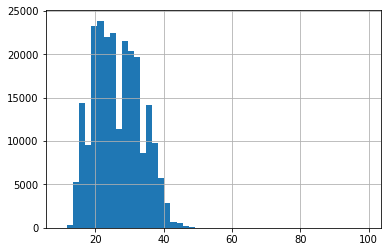

In [28]:
df.IDADEMAE.hist(bins=50)

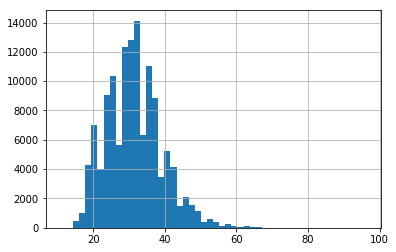

In [29]:
df[df["IDADEPAI"] > 0].IDADEPAI.hist(bins=50)

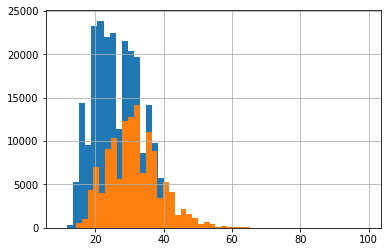

In [30]:
df.IDADEMAE.hist(bins=50)
df[df["IDADEPAI"] > 0].IDADEPAI.hist(bins=50)

In [31]:
por_local = df.groupby("LOCAL_NASCIMENTO")

In [45]:
por_local.nasceu.count()

LOCAL_NASCIMENTO
domicilio                            728
hospital                          235093
ignorado                               6
outro estabelecimento de saúde       848
outros                               285
Name: nasceu, dtype: int64

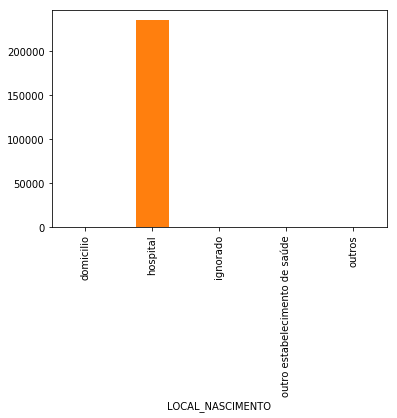

In [49]:
por_local.nasceu.count().plot.bar()

Será que a idade das mães é influenciada pelo local de nascimento?

In [32]:
por_local.IDADEMAE.describe()

,count,mean,std,min,25%,50%,75%,max
LOCAL_NASCIMENTO,,,,,,,,
domicilio,728.0,27.251374,7.290494,12.0,22.00,27.0,32.0,99.0
hospital,235093.0,26.617547,6.784363,10.0,21.00,26.0,32.0,58.0
ignorado,6.0,20.666667,5.163978,16.0,17.25,18.5,23.5,29.0
outro estabelecimento de saúde,848.0,27.087264,6.125174,14.0,22.00,27.0,31.0,46.0
outros,285.0,26.768421,8.640454,13.0,22.00,26.0,30.0,99.0


domicilio                              AxesSubplot(0.1,0.679412;0.363636x0.220588)
hospital                          AxesSubplot(0.536364,0.679412;0.363636x0.220588)
ignorado                               AxesSubplot(0.1,0.414706;0.363636x0.220588)
outro estabelecimento de saúde    AxesSubplot(0.536364,0.414706;0.363636x0.220588)
outros                                     AxesSubplot(0.1,0.15;0.363636x0.220588)
dtype: object

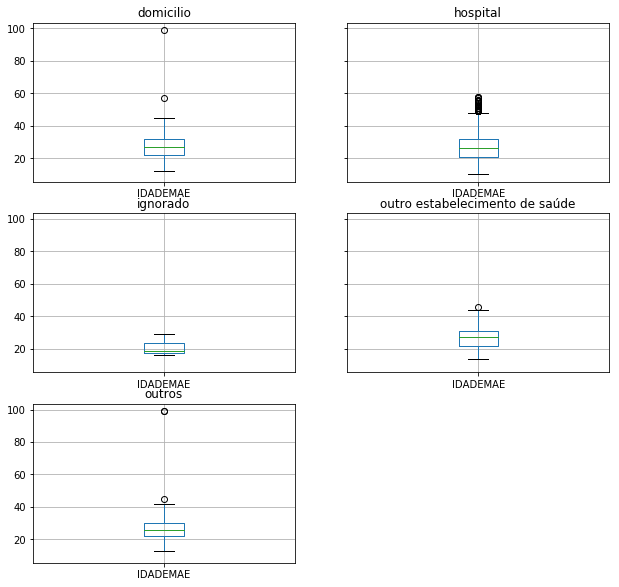

In [33]:
por_local.boxplot(column="IDADEMAE", figsize=(10, 10))

Será que a falta de um pai influencia no local de nascimento?

In [34]:
por_local_sem_pai = df[df["IDADEPAI"] <= 0].groupby("LOCAL_NASCIMENTO")

In [35]:
por_local_sem_pai.IDADEMAE.describe()

,count,mean,std,min,25%,50%,75%,max
LOCAL_NASCIMENTO,,,,,,,,
domicilio,454.0,26.308370,7.825191,12.0,20.0,25.0,31.0,99.0
hospital,107122.0,24.941133,6.626587,10.0,20.0,24.0,29.0,58.0
ignorado,3.0,21.000000,7.000000,16.0,17.0,18.0,23.5,29.0
outro estabelecimento de saúde,259.0,26.976834,6.683272,14.0,22.0,26.0,32.0,46.0
outros,217.0,26.608295,9.466731,13.0,21.0,25.0,30.0,99.0


domicilio                              AxesSubplot(0.1,0.679412;0.363636x0.220588)
hospital                          AxesSubplot(0.536364,0.679412;0.363636x0.220588)
ignorado                               AxesSubplot(0.1,0.414706;0.363636x0.220588)
outro estabelecimento de saúde    AxesSubplot(0.536364,0.414706;0.363636x0.220588)
outros                                     AxesSubplot(0.1,0.15;0.363636x0.220588)
dtype: object

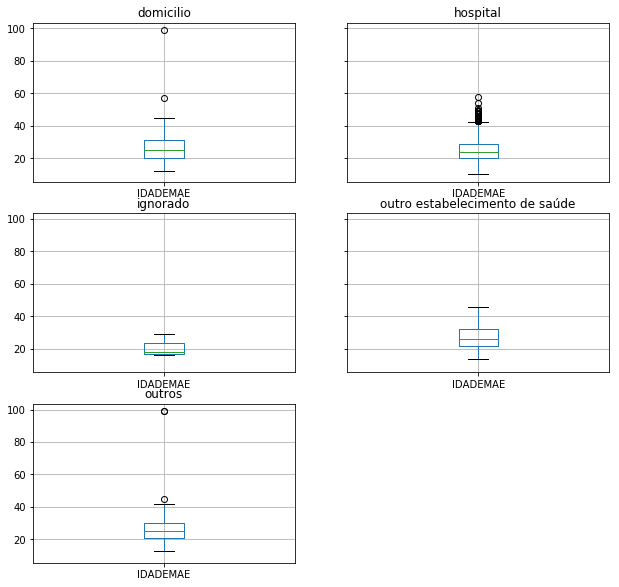

In [36]:
por_local_sem_pai.boxplot(column="IDADEMAE", figsize=(10, 10))

Vamos olhar o estado civil e ver como ele influencia os nascimentos:

In [46]:
por_estado_civil = df.groupby("EST_CIVIL_MAE")

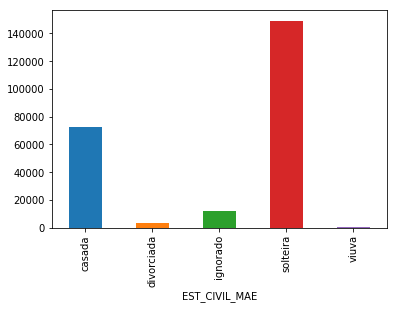

In [48]:
por_estado_civil.nasceu.count().plot.bar()

casada             AxesSubplot(0.1,0.679412;0.363636x0.220588)
divorciada    AxesSubplot(0.536364,0.679412;0.363636x0.220588)
ignorado           AxesSubplot(0.1,0.414706;0.363636x0.220588)
solteira      AxesSubplot(0.536364,0.414706;0.363636x0.220588)
viuva                  AxesSubplot(0.1,0.15;0.363636x0.220588)
dtype: object

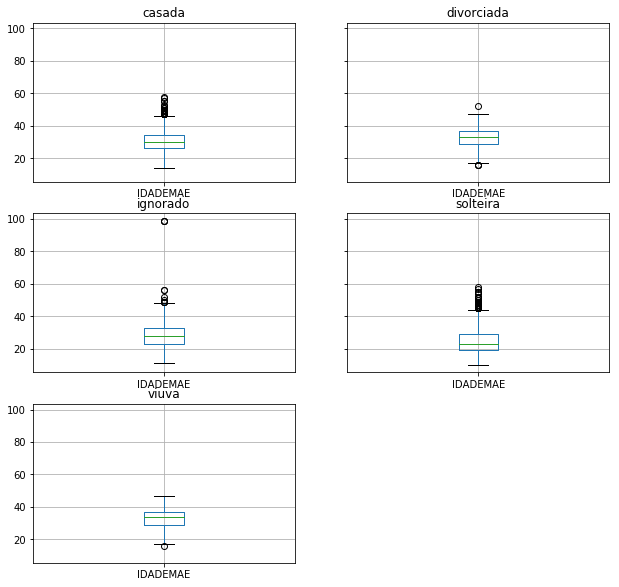

In [50]:
por_estado_civil.boxplot(column="IDADEMAE", figsize=(10, 10))

### Façam uma analise pela escolaridade das mães.

In [52]:
por_escolaridade = df.groupby("ESCOLARIDADE_MAE")

In [53]:
por_escolaridade.nasceu.count()

ESCOLARIDADE_MAE
1 a 3 anos       4717
12 ou mais      45088
4 a 7 anos      46032
8 a 11 anos    138139
ignorado         2644
nenhuma           340
Name: nasceu, dtype: int64